In [1]:
import pandas as pd
import sklearn
import sklearn.datasets

In [2]:
data = sklearn.datasets.load_iris(as_frame=True)

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,12)
plt.rcParams['font.size'] = 12

In [8]:
df = data['frame']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
N = len(data['feature_names'])
M = len(df)
L = len(data['target_names'])
(N,M), L

((4, 150), 3)

In [10]:
'hi'

'hi'

## Scatter Plot Matrix

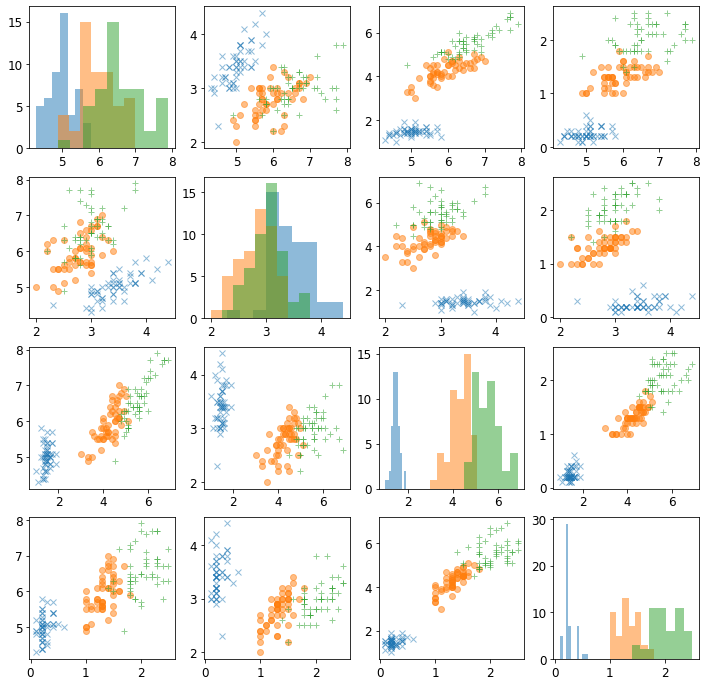

In [11]:
fig, axs = plt.subplots(N,N)#,sharex='col',sharey='row')
#print(axs.shape)
colors = ['C0','C1','C2']
markers = ['x','o','+']
for i in range(N):
    for j in range(N):
        if i == j:
            continue
        for label in range(3):
            x, y = df.query(f'target == {label}').iloc[:,[i,j]].values.T
            axs[i,j].plot(x, y, marker = markers[label], color=colors[label], ls="None", alpha=0.5)
            

for i in range(N):
    for label in range(3):
        x = df.query(f'target == {label}').iloc[:,i].values.T
        axs[i,i].hist(x,bins='auto', alpha=0.5)


In [12]:
x,y = df.query('target == 1').iloc[:,[1,2]].values.T

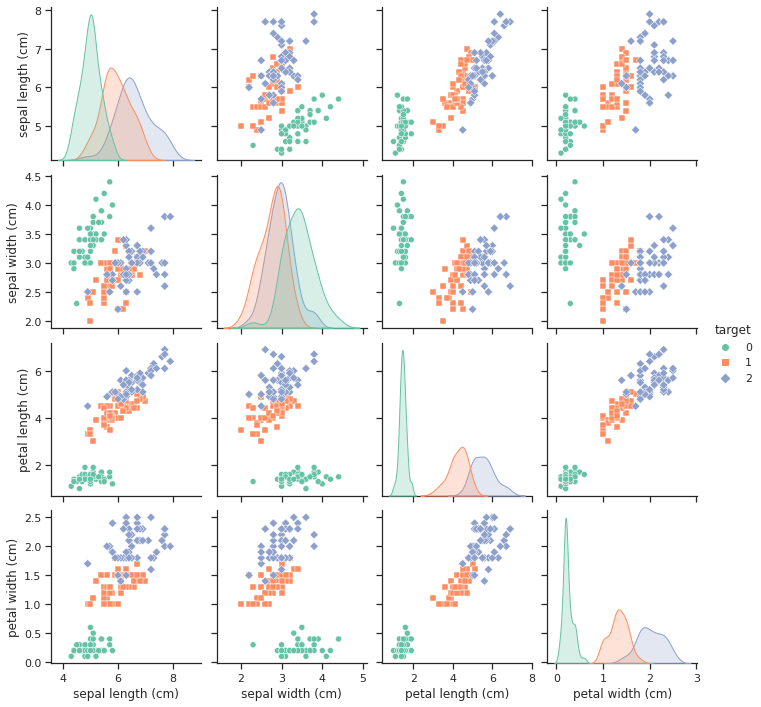

In [13]:
import seaborn as sns
sns.color_palette("Set2")
sns.set_theme(style="ticks")

#df = sns.load_dataset("penguins")
_ = sns.pairplot(df, hue="target",  markers=["o", "s", "D"], palette='Set2')

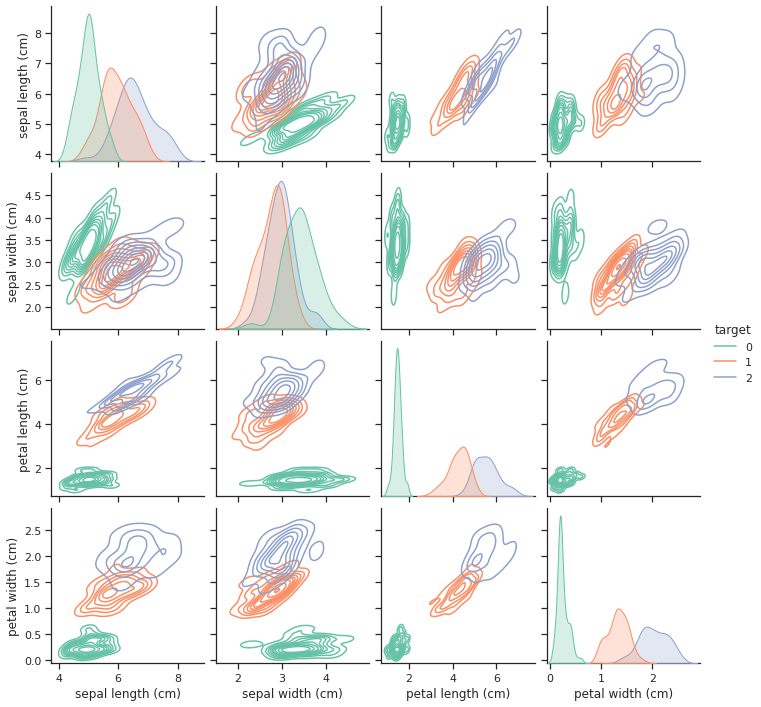

In [14]:
_ = sns.pairplot(df, hue="target",  markers=["o", "s", "D"], palette='Set2', kind='kde')

## Classic PCA Example

In [15]:
from sklearn import model_selection
#X_train, X_test, y_train, y_test = 
df_train, df_test = model_selection.train_test_split(df, random_state=1)
X_train, y_train = df_train.iloc[:,:-1].values, df_train.iloc[:,-1].values
X_test, y_test = df_test.iloc[:,:-1].values, df_test.iloc[:,-1].values

In [16]:
X_train.shape, X_test.shape,

((112, 4), (38, 4))

In [17]:
from sklearn import decomposition
from sklearn import datasets

pca = sklearn.decomposition.PCA(n_components=3)
pca.fit(X_train)

PCA(n_components=3)

In [18]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.92992945, 0.04637369, 0.01931237]), 0.995615513717183)

In [19]:
pca

PCA(n_components=3)

In [20]:
X_train_pca = pca.transform(X_train)

In [21]:
df_pca = pd.DataFrame(X_train_pca, columns=['C1','C2','C3'])
df_pca['target'] = y_train
df_pca

,C1,C2,C3,target
0,1.055427,0.089400,-0.309554,1
1,2.284314,-0.243260,-0.348537,2
2,2.136159,0.226238,0.023383,2
3,-2.676015,0.385282,0.033043,0
4,1.257318,-0.747392,-0.325459,2
...,...,...,...,...
107,1.409603,-0.124195,-0.154296,2
108,1.874443,0.072069,0.153011,2
109,1.260225,-0.315022,-0.340288,1
110,2.285526,0.198503,0.314448,2


### Do they overlap less in this projection?

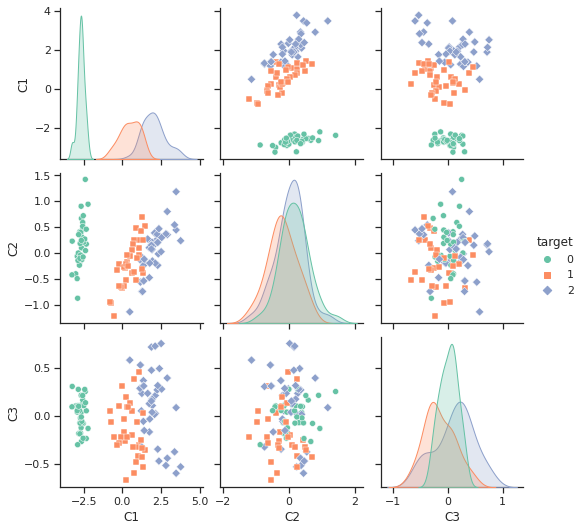

In [22]:
_ = sns.pairplot(df_pca, hue='target', markers=["o", "s", "D"], palette='Set2')#, kind='kde')

## Learn With a NN?

In [23]:
from sklearn.neural_network import MLPClassifier
layer_structure = (4,4,4,4)

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=layer_structure, 
                    random_state=1)

clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(4, 4, 4, 4), random_state=1,
              solver='lbfgs')

In [24]:
clf.score(X_train, y_train) #100%

0.9821428571428571

In [25]:
clf.score(X_test, y_test) ##92.1%

1.0

## Feature Dimension Reduction Effect

In [26]:
clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=layer_structure, 
                    random_state=1)

clf.fit(pca.transform(X_train), y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(4, 4, 4, 4), random_state=1,
              solver='lbfgs')

In [27]:
clf.score(pca.transform(X_train),y_train) #99.1%

0.9910714285714286

In [28]:
clf.score(pca.transform(X_test), y_test) #100%

1.0

## WIth different simpler layers

In [29]:
from sklearn.neural_network import MLPClassifier
layer_structure = (3,3)

clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=layer_structure, 
                    random_state=1)

clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3, 3), random_state=1,
              solver='lbfgs')

In [30]:
from sklearn import metrics
metrics.accuracy_score(clf.predict(X_train), y_train) #99.1 %

0.9642857142857143

In [31]:
metrics.accuracy_score(clf.predict(X_test), y_test) #97.4%

1.0

## Could we Learn This without the Labels?

### If We Know There's Three

In [32]:
from sklearn.cluster import KMeans

In [33]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y_pred = KMeans(n_clusters=3,random_state=2).fit_predict(X)
metrics.accuracy_score(y, y_pred) #89.3%

0.8933333333333333

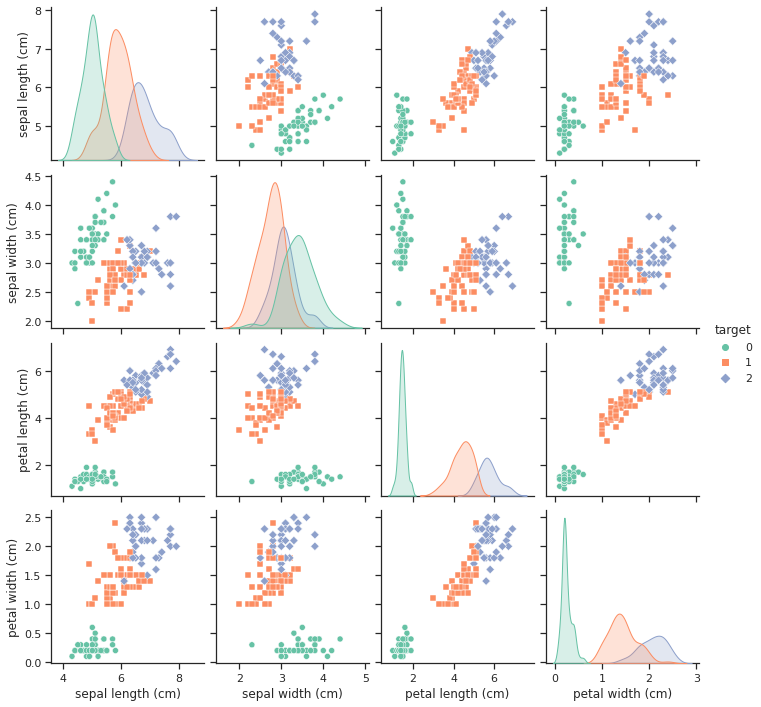

In [34]:
df_kmeans = df.copy()
df_kmeans['target'] = y_pred
_ = sns.pairplot(df_kmeans, hue='target', markers=["o", "s", "D"], palette='Set2')#, kind='kde')

### If we Don't know How many? Looks like 2

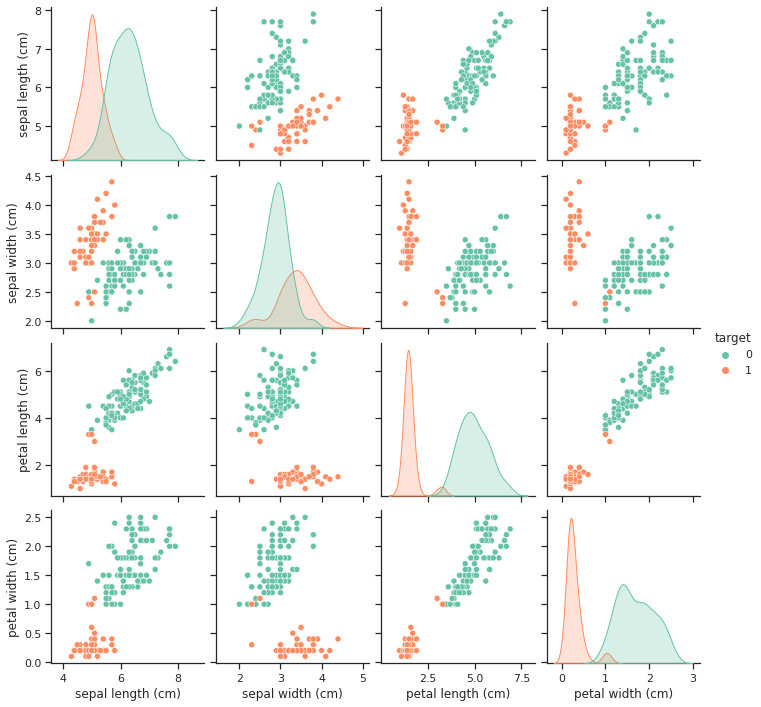

In [35]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
y_pred = KMeans(n_clusters=2,random_state=21).fit_predict(X)
metrics.accuracy_score(y, y_pred)

df_kmeans = df.copy()
df_kmeans['target'] = y_pred
_ = sns.pairplot(df_kmeans, hue='target',  palette='Set2')#, kind='kde')

## Do KMeans after PCA
k-means still doesn't separate them better.

In [36]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
pca.fit(X)
y_pred = KMeans(n_clusters=3).fit_predict(pca.transform(X))
metrics.accuracy_score(y, y_pred)

0.8933333333333333

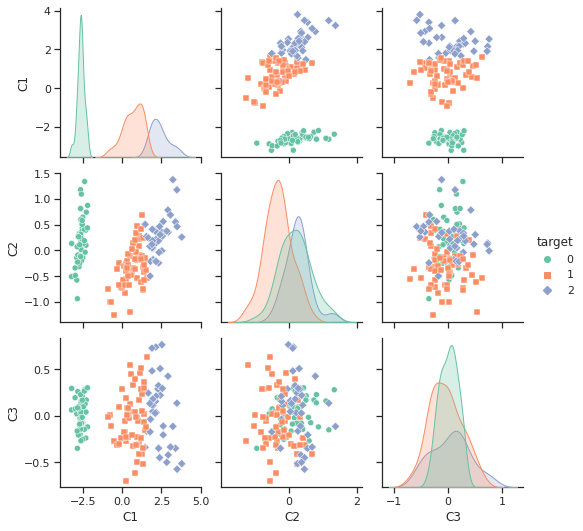

In [37]:
df_kmeans_pca = pd.DataFrame(pca.transform(X), columns=['C1','C2','C3'])
df_kmeans_pca['target'] = y_pred
_ = sns.pairplot(df_kmeans_pca, hue='target', markers=["o", "s", "D"], palette='Set2')#, kind='kde')